# Hands-On Pertemuan 9: Spark SQL

## Tujuan:
- Mengasah keterampilan analisis data menggunakan Spark SQL.
- Melakukan lebih banyak latihan SQL yang mengarah ke skenario dunia nyata.
- Mempersiapkan mahasiswa untuk menggunakan Spark SQL dalam proyek besar.


### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.


In [ ]:
pip install findspark


In [ ]:
pip install pyspark


In [ ]:
pip install pandas


In [ ]:
import findspark
findspark.init()

In [ ]:

from pyspark.sql import SparkSession
spark= SparkSession.builder.appName("Hands_On_Pertemuan_9").getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [ ]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


In [ ]:
spark.sql("""
SELECT e.Name, e.Gender, e.Salary
FROM employees e
JOIN (SELECT Gender, AVG(Salary) AS avg_salary FROM employees GROUP BY Gender) AS avg_gender_salary
ON e.Gender = avg_gender_salary.Gender
WHERE e.Salary > avg_gender_salary.avg_salary
""").show()

+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
+-----+------+------+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.


In [ ]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


In [ ]:
spark.sql('''
SELECT d.DeptName, e.Name, e.Salary,
       AVG(e.Salary) OVER (PARTITION BY d.DeptName) AS AvgDeptSalary,
       RANK() OVER (PARTITION BY d.DeptName ORDER BY e.Salary DESC) AS SalaryRank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId;
''').show()

+---------+-----+------+-------------+----------+
| DeptName| Name|Salary|AvgDeptSalary|SalaryRank|
+---------+-----+------+-------------+----------+
|       HR|James|  3000|       2850.0|         1|
|       HR|  Lee|  2700|       2850.0|         2|
|Marketing| Anna|  4100|       4100.0|         1|
+---------+-----+------+-------------+----------+



In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import avg, min, max, row_number

# Window partitioned by DeptId (Departemen) dan diurutkan berdasarkan Age (Usia)
windowSpec = Window.partitionBy("DeptId").orderBy("Age")

# Menghitung rata-rata, minimum, dan maksimum gaji untuk setiap usia di dalam setiap departemen
salary_trend_df = employees \
    .withColumn("avg_salary", avg("Salary").over(windowSpec)) \
    .withColumn("min_salary", min("Salary").over(windowSpec)) \
    .withColumn("max_salary", max("Salary").over(windowSpec)) \
    .withColumn("row_num", row_number().over(windowSpec))

# Menampilkan hasil
salary_trend_df.select("Name", "Age", "DeptId", "Salary", "avg_salary", "min_salary", "max_salary", "row_num") \
    .show()


+-----+---+------+------+----------+----------+----------+-------+
| Name|Age|DeptId|Salary|avg_salary|min_salary|max_salary|row_num|
+-----+---+------+------+----------+----------+----------+-------+
|  Lee| 23|     1|  2700|    2700.0|      2700|      2700|      1|
|James| 34|     1|  3000|    2850.0|      2700|      3000|      2|
| Anna| 28|     2|  4100|    4100.0|      4100|      4100|      1|
+-----+---+------+------+----------+----------+----------+-------+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


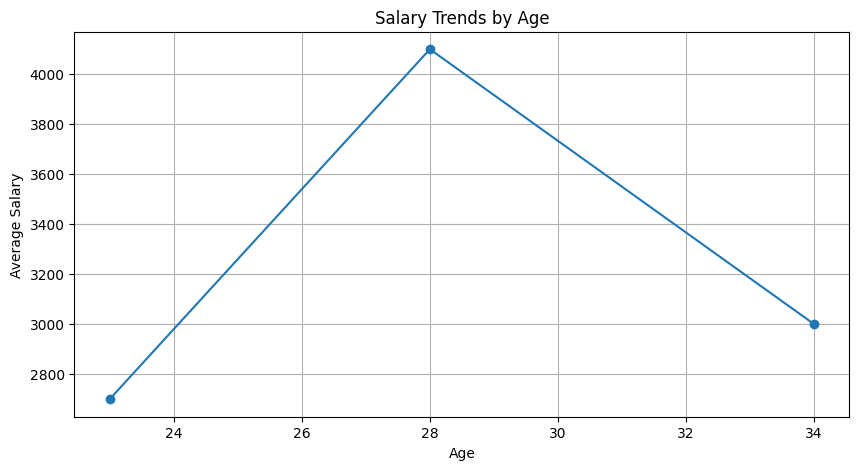

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.


    DeptName  TotalSalary  EmployeeCount
0         HR         5700              2
1  Marketing         4100              1


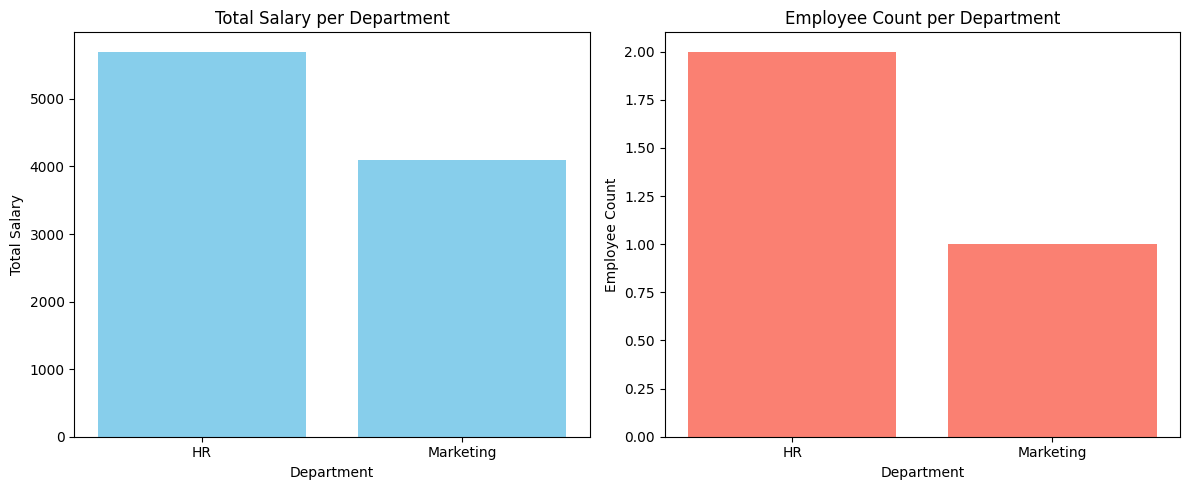

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung total gaji dan jumlah karyawan per departemen
result_tugas1 = spark.sql('''
    SELECT d.DeptName, SUM(e.Salary) AS TotalSalary, COUNT(e.Name) AS EmployeeCount
    FROM employees e
    JOIN departments d ON e.DeptId = d.DeptId
    GROUP BY d.DeptName
''').toPandas()

print(result_tugas1)
# Membuat figure untuk dua bar chart
plt.figure(figsize=(12, 5))

# Grafik batang untuk Total Gaji per Departemen
plt.subplot(1, 2, 1)
plt.bar(result_tugas1['DeptName'], result_tugas1['TotalSalary'], color='skyblue')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.title('Total Salary per Department')

# Grafik batang untuk Jumlah Karyawan per Departemen
plt.subplot(1, 2, 2)
plt.bar(result_tugas1['DeptName'], result_tugas1['EmployeeCount'], color='salmon')
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.title('Employee Count per Department')

# Menyusun layout agar rapi
plt.tight_layout()
plt.show()
